# United States College Rankings
Author: Alan Qiao, John-Wesley Appleton

# Introduction
In this notebook, we intend on developing a model to predict the admissions rate of colleges based on empirical data collected from the US Department of Education.college.

Our baseline model is the admissions rate that all institutions must report. 

Since admission rate is continuous, we used several continuous regression models (Linear, Ridge, Lasso) to construct our model.


In [ ]:
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive

## 1. Read In Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_url = '/content/drive/My Drive/Dataset/'

In [ ]:
info_df = pd.concat([pd.read_csv(base_url+'MERGED2019_20_PP.csv'),
                     pd.read_csv(base_url+'MERGED2018_19_PP.csv'),
                     pd.read_csv(base_url+'MERGED2017_18_PP.csv'),
                     pd.read_csv(base_url+'MERGED2016_17_PP.csv'),
                     pd.read_csv(base_url+'MERGED2015_16_PP.csv')],
                    keys=[2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
                    )
info_df = info_df.reset_index()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,1503,1517,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2393,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2855) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1729,1909,1910,1911,1912,1913,2376,2377,2958) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.us

In [ ]:
info_df

,level_0,level_1,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,2019,0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35512,2015,7661,48154401,4220901,42209,National Personal Training Institute of Cleveland,Highland Heights,OH,44143,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35513,2015,7662,48387801,4223701,42237,Bay Area Medical Academy - San Jose Satellite ...,San Jose,CA,95113,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35514,2015,7663,48400201,4228101,42281,High Desert Medical College - Bakerfield,Bakersfield,CA,93301,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35515,2015,7664,48414501,4232401,42324,Vantage College-San Antonio,San Antonio,TX,782211361,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
info_df = info_df.drop(columns=['level_1'])
info_df = info_df.rename(columns={'level_0': 'YEAR'})

In [ ]:
info_df.head()

,YEAR,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,...,COUNT_WNE_MALE1_P8,MD_EARN_WNE_MALE1_P8,GT_THRESHOLD_P10,MD_EARN_WNE_INC1_P10,MD_EARN_WNE_INC2_P10,MD_EARN_WNE_INC3_P10,MD_EARN_WNE_INDEP1_P10,MD_EARN_WNE_INDEP0_P10,MD_EARN_WNE_MALE0_P10,MD_EARN_WNE_MALE1_P10
0,2019,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
info_df.dtypes.value_counts()

object     2084
float64     893
int64        13
dtype: int64

In [ ]:
info_df.shape

(35517, 2990)

In [ ]:
info_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35517 entries, 0 to 35516
Data columns (total 2990 columns):
 #     Column                            Non-Null Count  Dtype  
---    ------                            --------------  -----  
 0     YEAR                              35517 non-null  int64  
 1     UNITID                            35517 non-null  int64  
 2     OPEID                             35517 non-null  int64  
 3     OPEID6                            35517 non-null  int64  
 4     INSTNM                            35517 non-null  object 
 5     CITY                              35517 non-null  object 
 6     STABBR                            35517 non-null  object 
 7     ZIP                               35517 non-null  object 
 8     ACCREDAGENCY                      6347 non-null   object 
 9     INSTURL                           6666 non-null   object 
 10    NPCURL                            6139 non-null   object 
 11    SCH_DEG                           282

In [ ]:
info_df = info_df.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# 2. Clean Dataset

Since we want to plot admissions rate. We can't keep any data without an admissions rate.

In [ ]:
info_df = info_df.dropna(subset=['ADM_RATE'])

Our dataset is very large and there likely are many missing values. The cause for this may be that earlier surveys did track these fields, or that obtaining data is highly difficult due to logistic or privacy constraints, or that very few schools or students have this characteristic. Additionally, this could be due to the issue raised above: some data is for multiple years after graduation, and we do not have access to that.
Let's match these fields against the data dictionary to sample what type of fields are missing the most data.

In [ ]:
data_dict = pd.read_excel(base_url+'CollegeScorecardDataDictionary.xlsx', sheet_name="Institution_Data_Dictionary")
data_dict.head() 

,NAME OF DATA ELEMENT,dev-category,developer-friendly name,API data type,INDEX,VARIABLE NAME,VALUE,LABEL,SOURCE,SHOWN/USE ON SITE,NOTES
0,Unit ID for institution,root,id,integer,NaN,UNITID,NaN,NaN,IPEDS,Yes,NaN
1,8-digit OPE ID for institution,root,ope8_id,string,varchar(10),OPEID,NaN,NaN,IPEDS,Yes,NaN
2,6-digit OPE ID for institution,root,ope6_id,string,varchar(10),OPEID6,NaN,NaN,IPEDS,Yes,NaN
3,Institution name,school,name,autocomplete,fulltext,INSTNM,NaN,NaN,IPEDS,Yes,NaN
4,City,school,city,autocomplete,varchar(200),CITY,NaN,NaN,IPEDS,Yes,NaN


In the data set there is a column called "CURROPER" which indicates whether the institution is still in operation. This is not relevant for our analysis, and so we will drop any rows which have 0 in the columns, and then we will drop the column.

In [ ]:
info_df = info_df[info_df['CURROPER'] != 0].drop(columns='CURROPER')
curr_schools = info_df[info_df['YEAR'] == 2019]['UNITID']
info_df = info_df[info_df['UNITID'].isin(curr_schools)]

We will first create two percent missing dataframe. The first one contains all of the years for which we have data. The second contains data for only 2019. The reason for the second data frame is that there is some data which is unavailable to us, such as: "DEATH_YR6_RT"



In [ ]:
percent_missing = info_df.isnull().sum() * 100 / len(info_df)
missing_value_df = pd.DataFrame({'column_name': info_df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)

In [ ]:
percent_missing_2019 = info_df[info_df['YEAR'] == 2019].isnull().sum() * 100 / len(info_df[info_df['YEAR'] == 2019])
missing_value_2019_df = pd.DataFrame({'column_name': info_df[info_df['YEAR'] == 2019].columns,
                                 'percent_missing': percent_missing_2019}).reset_index(drop=True)

In [ ]:
missing_value_2019_df

,column_name,percent_missing
0,YEAR,0.0
1,UNITID,0.0
2,OPEID,0.0
3,OPEID6,0.0
4,INSTNM,100.0
...,...,...
2984,MD_EARN_WNE_INC3_P10,100.0
2985,MD_EARN_WNE_INDEP1_P10,100.0
2986,MD_EARN_WNE_INDEP0_P10,100.0
2987,MD_EARN_WNE_MALE0_P10,100.0


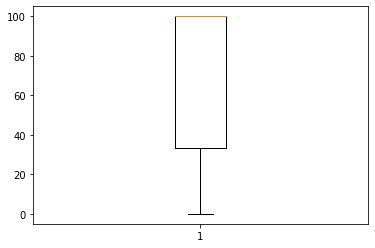

In [ ]:
plt.boxplot(missing_value_2019_df['percent_missing'])
plt.show()

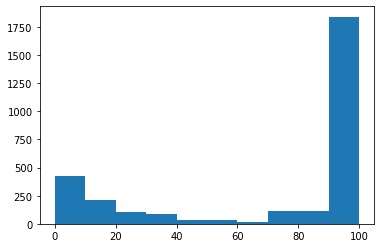

In [ ]:
plt.hist(missing_value_2019_df['percent_missing'])
plt.show()

Notice that the data dictionary has duplicate entries for data elements with more than one value that needs to be specified. For the purpose of joining data element name and the corresponding notes, we only want one entry for each element.

In [ ]:
missing_value_df = missing_value_df.merge(data_dict.drop_duplicates('NAME OF DATA ELEMENT')[['NAME OF DATA ELEMENT', 'VARIABLE NAME', 'NOTES']], how='inner', left_on='column_name', right_on='VARIABLE NAME', suffixes=[None, ''])
missing_value_df = missing_value_df.drop(columns=['VARIABLE NAME'])

In [ ]:
missing_value_2019_df = missing_value_2019_df.merge(data_dict.drop_duplicates('NAME OF DATA ELEMENT')[['NAME OF DATA ELEMENT', 'VARIABLE NAME', 'NOTES']], how='inner', left_on='column_name', right_on='VARIABLE NAME', suffixes=[None, ''])
missing_value_2019_df = missing_value_2019_df.drop(columns=['VARIABLE NAME'])
missing_value_2019_df

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
0,UNITID,0.0,Unit ID for institution,NaN
1,OPEID,0.0,8-digit OPE ID for institution,NaN
2,OPEID6,0.0,6-digit OPE ID for institution,NaN
3,INSTNM,100.0,Institution name,NaN
4,CITY,100.0,City,NaN
...,...,...,...,...
2935,MD_EARN_WNE_INC3_P10,100.0,Median earnings of students working and not en...,NaN
2936,MD_EARN_WNE_INDEP1_P10,100.0,Median earnings of independent students workin...,NaN
2937,MD_EARN_WNE_INDEP0_P10,100.0,Median earnings of dependent students working ...,NaN
2938,MD_EARN_WNE_MALE0_P10,100.0,Median earnings of non-male students working a...,NaN


From a quick glance, it seems that some columns with 100% data missing are discontinued. These we can safely drop, so we first add them to a list of columns to_drop before we examine the remaining more closely.

In [ ]:
columns_to_drop = missing_value_df[missing_value_df['NOTES'].str.contains('Discontinued', na=False)]['column_name']
columns_to_drop

20              LOCALE2
42              SATWR25
43              SATWR75
46             SATWRMID
53              ACTWR25
             ...       
1756    D150_L4_BLACKNH
1757        D150_L4_API
1816         GT_28K_P10
1817          GT_28K_P8
1818          GT_28K_P6
Name: column_name, Length: 306, dtype: object

That's 306 taken care of. Lots more to go.

In [ ]:
info_df = info_df.drop(columns=columns_to_drop)
missing_value_df = missing_value_df[~missing_value_df['NOTES'].str.contains('Discontinued', na=False)]

In [ ]:
missing_value_2019_df = missing_value_2019_df[~missing_value_2019_df['NOTES'].str.contains('Discontinued', na=False)]
missing_value_2019_df

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
0,UNITID,0.0,Unit ID for institution,NaN
1,OPEID,0.0,8-digit OPE ID for institution,NaN
2,OPEID6,0.0,6-digit OPE ID for institution,NaN
3,INSTNM,100.0,Institution name,NaN
4,CITY,100.0,City,NaN
...,...,...,...,...
2935,MD_EARN_WNE_INC3_P10,100.0,Median earnings of students working and not en...,NaN
2936,MD_EARN_WNE_INDEP1_P10,100.0,Median earnings of independent students workin...,NaN
2937,MD_EARN_WNE_INDEP0_P10,100.0,Median earnings of dependent students working ...,NaN
2938,MD_EARN_WNE_MALE0_P10,100.0,Median earnings of non-male students working a...,NaN


After thoroughly reading the descriptions, it seems that the columns with significant missing values can be placed into four categories.
1. Data Elements that would be very useful to have but unfortunately too sparce to use.  
    a. Examples include fields related to outcome of Pell Grant or First Generation students after leaving institution within 8 years of entry. Knowing more about the outcomes of Pell Grant, First Generation, and part-time students would be helpful to gauge how well the institution can assist special student cohorts, but unfortunately this data is not available perhaps due to difficulty of tracking, or perhaps most smaller institutions simply don't have these populations.
2. Data Elements missing many entries, but a fixed value can be assigned to the missing entries.  
    a. Fields like flag for Historically Black Colleges and Universities have a lot of missing entries, but the missing entries can be assigned value of 0 (No) because all the officially recognized ones have indicated 1 (Yes).
3. Data Elements missing somewhat significant amount of entries, but considering dataset size removing all rows with missing values can be an option.  
    a. These are fields that are sufficiently important that discarding 30% of nearly 50,000 entries could be justified. 35,000 entries is still a rather large dataset, and so training a model on it may still be reasonable. However, caution is needed as if there are multiple such fields and the subset of institutions missing these fields do not overlap, there may be too few data remaining.  
    b. Examples include Cost of Attendance, Proportion of Full-time Faculty
4. Data Elements that may or may not have significant missing entries but can be omitted from analysis.  
    a. An example would be percentage of degrees awarded in a certain field. It does not really make sense to say, for example, that a school offering more Computer Science degrees is better. It may just happen that this school has good resources to offer and also specializes in Computer Science. Thus, dropping these fields is fine regardless of how much data is available.

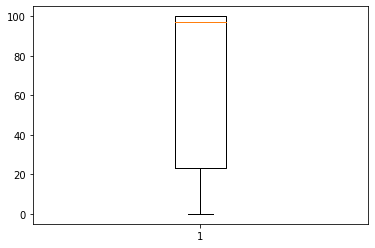

In [ ]:
plt.boxplot(missing_value_2019_df['percent_missing'])
plt.show()

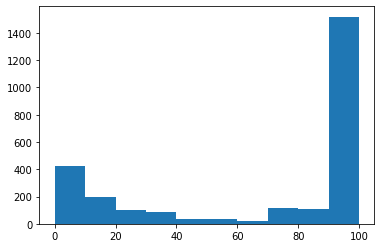

In [ ]:
plt.hist(missing_value_2019_df['percent_missing'])
plt.show()

Still a lot of columns with close to 100% missing. Let's see what's going on.

In [ ]:
missing_value_2019_df.sort_values(by='percent_missing', ascending=False).head(10)

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
1452,LO_INC_YR4_N,100.0,"Number of low-income (less than $30,000 in nom...",NaN
1116,LOAN_ENRL_2YR_TRANS_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1114,LOAN_ENRL_ORIG_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1113,LOAN_WDRAW_2YR_TRANS_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1112,LOAN_WDRAW_4YR_TRANS_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1111,LOAN_WDRAW_ORIG_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1110,LOAN_COMP_2YR_TRANS_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1109,LOAN_COMP_4YR_TRANS_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1108,LOAN_COMP_ORIG_YR6_RT,100.0,Percent of students who received a federal loa...,NaN
1107,LOAN_DEATH_YR6_RT,100.0,Percent of students who received a federal loa...,NaN


It seems like the remaining columns with 100% missing are columns that are useless to us because not enough time has passed. Let's get rid of them.

In [ ]:
columns_to_drop = missing_value_2019_df[missing_value_2019_df['percent_missing'] == 100]['column_name']
columns_to_drop

3                       INSTNM
4                         CITY
5                       STABBR
7                 ACCREDAGENCY
8                      INSTURL
                 ...          
2935      MD_EARN_WNE_INC3_P10
2936    MD_EARN_WNE_INDEP1_P10
2937    MD_EARN_WNE_INDEP0_P10
2938     MD_EARN_WNE_MALE0_P10
2939     MD_EARN_WNE_MALE1_P10
Name: column_name, Length: 1213, dtype: object

Wow that's a lot of columns!

In [ ]:
info_df = info_df.drop(columns=columns_to_drop)
missing_value_df = missing_value_df[missing_value_df['percent_missing'] != 100].sort_values(by='percent_missing', ascending=False)
missing_value_2019_df = missing_value_2019_df[missing_value_2019_df['percent_missing'] != 100].sort_values(by='percent_missing', ascending=False)
missing_value_2019_df.head(10)

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
2214,BBRR1_PP_UGNOCOMP_DFLT,99.897907,Percentage of undergraduate non-completer unde...,NaN
2187,BBRR1_FED_GRNOCOMP_DFLT,99.846861,Percentage of graduate non-completer graduate ...,NaN
2194,BBRR1_FED_GRNOCOMP_DISCHARGE,99.846861,Percentage of graduate non-completer graduate ...,NaN
2221,BBRR1_PP_UGNOCOMP_DISCHARGE,99.795814,Percentage of undergraduate non-completer unde...,NaN
2293,BBRR2_FED_GRNOCOMP_DISCHARGE,99.795814,Percentage of graduate non-completer graduate ...,NaN
2216,BBRR1_PP_UGNOCOMP_FBR,99.693721,Percentage of undergraduate non-completer unde...,NaN
2215,BBRR1_PP_UGNOCOMP_DLNQ,99.693721,Percentage of undergraduate non-completer unde...,NaN
2218,BBRR1_PP_UGNOCOMP_NOPROG,99.693721,Percentage of undergraduate non-completer unde...,NaN
2219,BBRR1_PP_UGNOCOMP_MAKEPROG,99.693721,Percentage of undergraduate non-completer unde...,NaN
2220,BBRR1_PP_UGNOCOMP_PAIDINFULL,99.693721,Percentage of undergraduate non-completer unde...,NaN


In [ ]:
missing_value_2019_df = missing_value_2019_df.sort_values(by='percent_missing', ascending=False)
missing_value_2019_df.head(10)

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
2214,BBRR1_PP_UGNOCOMP_DFLT,99.897907,Percentage of undergraduate non-completer unde...,NaN
2194,BBRR1_FED_GRNOCOMP_DISCHARGE,99.846861,Percentage of graduate non-completer graduate ...,NaN
2187,BBRR1_FED_GRNOCOMP_DFLT,99.846861,Percentage of graduate non-completer graduate ...,NaN
2221,BBRR1_PP_UGNOCOMP_DISCHARGE,99.795814,Percentage of undergraduate non-completer unde...,NaN
2293,BBRR2_FED_GRNOCOMP_DISCHARGE,99.795814,Percentage of graduate non-completer graduate ...,NaN
2216,BBRR1_PP_UGNOCOMP_FBR,99.693721,Percentage of undergraduate non-completer unde...,NaN
2218,BBRR1_PP_UGNOCOMP_NOPROG,99.693721,Percentage of undergraduate non-completer unde...,NaN
2219,BBRR1_PP_UGNOCOMP_MAKEPROG,99.693721,Percentage of undergraduate non-completer unde...,NaN
2220,BBRR1_PP_UGNOCOMP_PAIDINFULL,99.693721,Percentage of undergraduate non-completer unde...,NaN
2217,BBRR1_PP_UGNOCOMP_DFR,99.693721,Percentage of undergraduate non-completer unde...,NaN


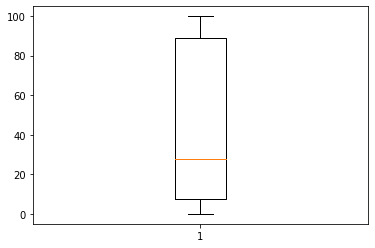

In [ ]:
plt.boxplot(missing_value_2019_df['percent_missing'])
plt.show()

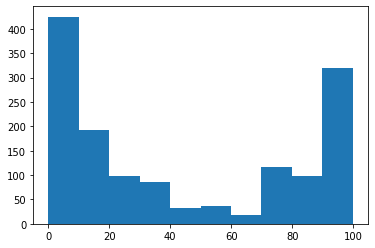

In [ ]:
plt.hist(missing_value_2019_df['percent_missing'])
plt.show()

That's looking a lot better! We're in a much better position now. Let's tackle the columns which contain a Boolean value.

Some of these have NaN instead of 0, and so we will replace those. Additionally, some of the columns are only defined for 2019, and so we need to distribute those values down to previous years.

One observation is that any column that is a Flag falls in category 2, as if the flag does not apply, we can simply set it to 0 (no). We first identify these flags.

In [ ]:
columns_to_fill = missing_value_df[missing_value_df['NAME OF DATA ELEMENT'].str.contains('Flag')]
columns_to_fill

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
34,WOMENONLY,78.989704,Flag for women-only college,NaN
26,HBCU,78.989704,Flag for Historically Black College and Univer...,NaN
33,MENONLY,78.989704,Flag for men-only college,NaN
27,PBI,78.989704,Flag for predominantly black institution,NaN
32,NANTI,78.989704,Flag for Native American non-tribal institution,NaN
28,ANNHI,78.989704,Flag for Alaska Native Native Hawaiian serving...,NaN
29,TRIBAL,78.989704,Flag for tribal college and university,NaN
31,HSI,78.989704,Flag for Hispanic-serving institution,NaN
30,AANAPII,78.989704,Flag for Asian American Native American Pacifi...,NaN
12,MAIN,0.000000,Flag for main campus,NaN


The first 9 are all flags for special institutions. Upon reviewing the changelog for the data set, it seems that these flags were just added in 2019-2020.

In [ ]:
info_df[info_df['YEAR'] == 2019][['TRIBAL', 'PBI', 'NANTI', 'HSI', 'AANAPII', 'HBCU', 'ANNHI', 'WOMENONLY', 'MENONLY']].apply(pd.Series.value_counts)

,TRIBAL,PBI,NANTI,HSI,AANAPII,HBCU,ANNHI,WOMENONLY,MENONLY
0.0,1957,1941,1949,1768,1882,1895,1947,1925,1914
1.0,2,18,10,191,77,64,12,34,45


In [ ]:
info_df[info_df['YEAR']==2019]['UNITID'].size

1959

In fact, there are a few missing entry in the year that these columns were implemented.  
Since these attributes are unlikely to change past 10 years, we will simply fill in missing entries in the previous years using the value from 2019.

In [ ]:
def copyOver(x, year, column, default):
  tmp = info_df.loc[(info_df['YEAR'] == year) & (info_df['UNITID'] == x), [column]]
  if tmp.size < 0:
    return tmp.append(default)
  return tmp

In [ ]:
cols = ['TRIBAL', 'PBI', 'NANTI', 'HSI', 'AANAPII', 'HBCU', 'ANNHI', 'WOMENONLY', 'MENONLY']
for c in cols:
  info_df[c] = info_df[c].fillna(0)
  info_df[c] = info_df['UNITID'].apply(lambda x: copyOver(x, 2019, c, 0))

In [ ]:
info_df = info_df.fillna(value={'DISTANCEONLY': 0})

In [ ]:
percent_missing = info_df.isnull().sum() * 100 / len(info_df)
missing_value_df = pd.DataFrame({'column_name': info_df.columns,
                                 'percent_missing': percent_missing}).reset_index(drop=True)

percent_missing_2019 = info_df[info_df['YEAR'] == 2019].isnull().sum() * 100 / len(info_df[info_df['YEAR'] == 2019])
missing_value_2019_df = pd.DataFrame({'column_name': info_df[info_df['YEAR'] == 2019].columns,
                                 'percent_missing': percent_missing_2019}).reset_index(drop=True)

missing_value_df = missing_value_df.merge(data_dict.drop_duplicates('NAME OF DATA ELEMENT')[['NAME OF DATA ELEMENT', 'VARIABLE NAME', 'NOTES']], how='inner', left_on='column_name', right_on='VARIABLE NAME', suffixes=[None, ''])
missing_value_df = missing_value_df.drop(columns=['VARIABLE NAME'])

missing_value_2019_df = missing_value_2019_df.merge(data_dict.drop_duplicates('NAME OF DATA ELEMENT')[['NAME OF DATA ELEMENT', 'VARIABLE NAME', 'NOTES']], how='inner', left_on='column_name', right_on='VARIABLE NAME', suffixes=[None, ''])
missing_value_2019_df = missing_value_2019_df.drop(columns=['VARIABLE NAME'])

In [ ]:
columns_to_fill = missing_value_df[missing_value_df['NAME OF DATA ELEMENT'].str.contains('Flag')]
columns_to_fill

,column_name,percent_missing,NAME OF DATA ELEMENT,NOTES
5,MAIN,0.0,Flag for main campus,NaN
18,HBCU,0.0,Flag for Historically Black College and Univer...,NaN
19,PBI,0.0,Flag for predominantly black institution,NaN
20,ANNHI,0.0,Flag for Alaska Native Native Hawaiian serving...,NaN
21,TRIBAL,0.0,Flag for tribal college and university,NaN
22,AANAPII,0.0,Flag for Asian American Native American Pacifi...,NaN
23,HSI,0.0,Flag for Hispanic-serving institution,NaN
24,NANTI,0.0,Flag for Native American non-tribal institution,NaN
25,MENONLY,0.0,Flag for men-only college,NaN
26,WOMENONLY,0.0,Flag for women-only college,NaN


Awesome! It's working!

Next, we will remove all the columns with more than 40% missing, because we cannot use KNN on a column with so much missing data.

In [ ]:
columns_to_drop = missing_value_df[missing_value_df['percent_missing'] > 40]['column_name']


In [ ]:
info_df = info_df.drop(columns=columns_to_drop)

In [ ]:
missing_value_df = missing_value_df[missing_value_df['percent_missing'] < 40]

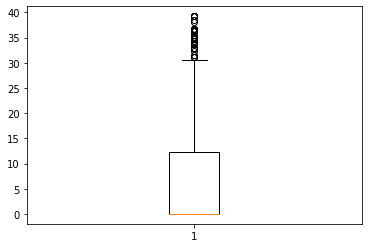

In [ ]:
plt.boxplot(missing_value_df['percent_missing'])
plt.show()

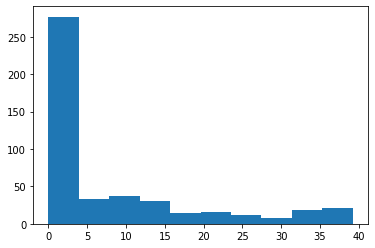

In [ ]:
plt.hist(missing_value_df['percent_missing'])
plt.show()

Finally, we have done all the custom data engineering we could. The final step to cleaning the dataset would be to fill in the missing values with KNN. For this, we will be using the KNNImputer from Sklearn. Since this can only be used on a sklearn dataset, we will save this step until the actual modeling.

# Visualizations


Our goal is to model admission rate and determine which factors contribute the most to a low/high admission rate. This will help us determine potentially what features makes a school more popular and more competitive than others.

One possible factor that may have a strong correlation is tuition. It seems reasonable that schools which are more competitive and thus likely offer better educational outcomes will be able to charge more. So we first try to visualize the correlation between the two.

In [ ]:
info_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9324 entries, 0 to 35068
Data columns (total 516 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    YEAR                          int64  
 1    UNITID                        int64  
 2    OPEID                         int64  
 3    OPEID6                        int64  
 4    MAIN                          int64  
 5    NUMBRANCH                     int64  
 6    PREDDEG                       int64  
 7    HIGHDEG                       int64  
 8    CONTROL                       int64  
 9    ST_FIPS                       int64  
 10   REGION                        int64  
 11   HBCU                          object 
 12   PBI                           object 
 13   ANNHI                         object 
 14   TRIBAL                        object 
 15   AANAPII                       object 
 16   HSI                           object 
 17   NANTI                         object 
 18   MENON

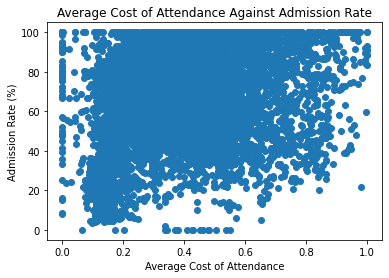

In [ ]:
plt.scatter(info_df['COSTT4_A'], info_df['ADM_RATE']*100)
plt.ylabel('Admission Rate (%)')
plt.xlabel('Average Cost of Attendance')
plt.title('Average Cost of Attendance Against Admission Rate')
plt.show()

There does not seem to be a direct correlation between the two. However, one thing is that as the cost of attendance increases (above $60k), there seems to be an increasingly evident inverse relation between the two. 

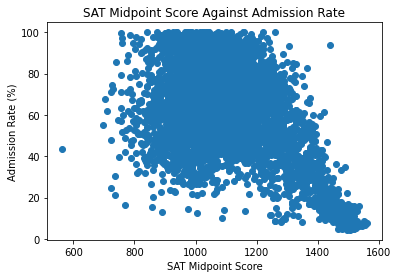

In [ ]:
plt.scatter(info_df['SATVRMID']+info_df['SATMTMID'], info_df['ADM_RATE']*100)
plt.ylabel('Admission Rate (%)')
plt.xlabel('SAT Midpoint Score')
plt.title('SAT Midpoint Score Against Admission Rate')
plt.show()

This time, there is a more evident trend that higher SAT Midpoint scores is correlated with lower Admission rates.

We can perform a similar analysis with the ACT scores, and they should show the same trend.

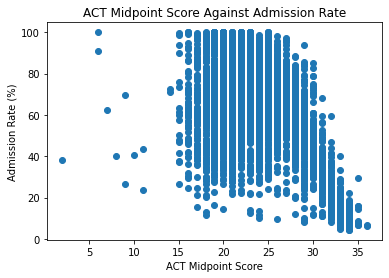

In [ ]:
plt.scatter(info_df['ACTCMMID'], info_df['ADM_RATE']*100)
plt.ylabel('Admission Rate (%)')
plt.xlabel('ACT Midpoint Score')
plt.title('ACT Midpoint Score Against Admission Rate')
plt.show()

As expected, we see a similar trend.

One final paramter we want to study is the Percentage of students who received Pell Grants, as these are usually given to poorer students who are performing well academically.

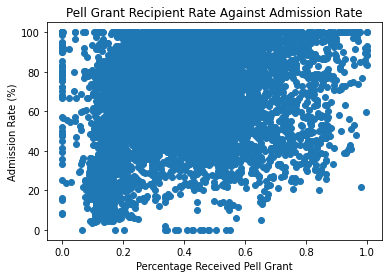

In [ ]:
plt.scatter(info_df['PCTPELL'], info_df['ADM_RATE']*100)
plt.ylabel('Admission Rate (%)')
plt.xlabel('Percentage Received Pell Grant')
plt.title('Pell Grant Recipient Rate Against Admission Rate')
plt.show()

There seems to be no real correlation between the two.

Finally, let's look for correlation between all our features, just to make sure that there is nothing that will interfere with our regressions.

In [ ]:
target = info_df['ADM_RATE']
features_df = info_df.drop(columns=['ADM_RATE'])

In [ ]:
features_df = features_df.select_dtypes(exclude=['object'])

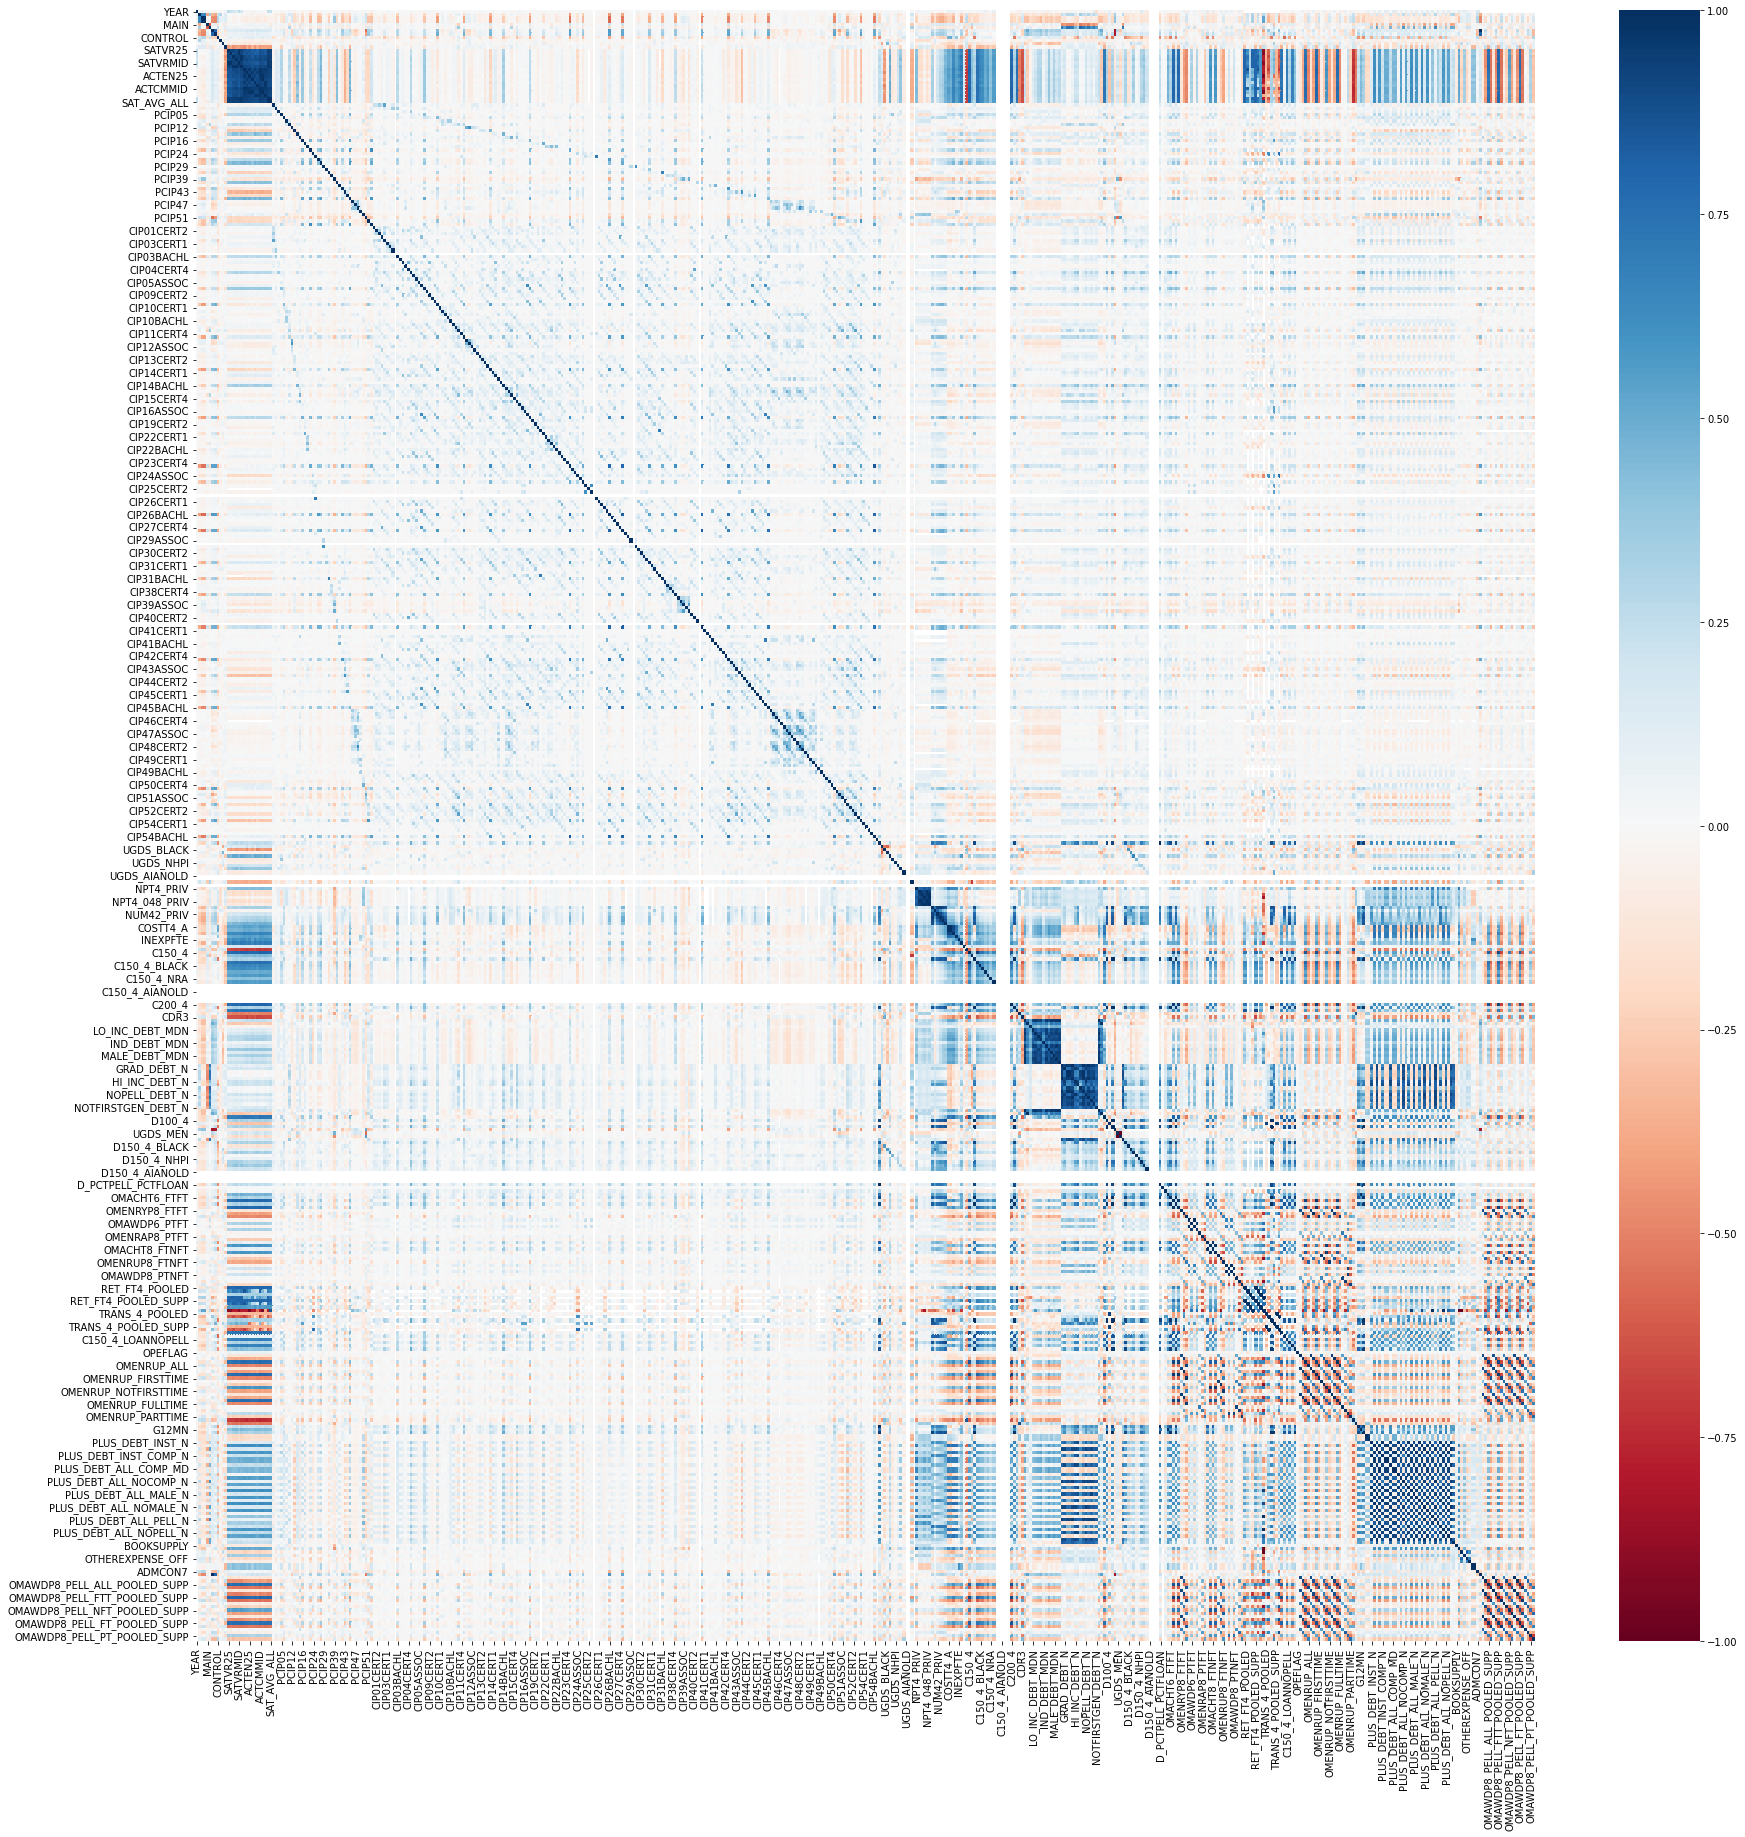

In [ ]:
import seaborn as sns
# TO-DO: Get the correlation matrix
corr_matrix = features_df.corr()

# TO-DO: Plot correlation heatmap (4 points)
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='RdBu')
plt.show()

We can see that there are a few blocks of high correlation. For example, the SAT and ACT scores seems highly correlated. This makes sense because a school will have similar requirements for both SAT and ACT, and the score ranges should not be too big, which makes the numbers quite similar.

# Modeling

Now, it is time to fill in the remaining missing data using KNN.

In [ ]:
from sklearn.impute import KNNImputer

imp = KNNImputer()
features = imp.fit_transform(features_df)

Next, we will split the data in a 80/20 train-test split.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Since we have many columns, we will first run PCA to compute the explained variance of each component, and reduce the number of components needed for our regression accordingly. We will use 80% Total variance as our threshold.

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)
pca = PCA(n_components=493)
pca_x_train = pca.fit_transform(x_train_sc)

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = pca.explained_variance_ratio_.cumsum()
cum_evr

array([0.11519779, 0.19415428, 0.23602175, 0.26921402, 0.29083417,
       0.31013192, 0.32906168, 0.34543381, 0.35924139, 0.37177151,
       0.38380282, 0.39557287, 0.40595995, 0.41595462, 0.42565221,
       0.43455987, 0.44337262, 0.4520651 , 0.46016963, 0.46797977,
       0.47534584, 0.48210252, 0.48876272, 0.49508896, 0.50123272,
       0.50698212, 0.51259808, 0.51801737, 0.52335629, 0.52855142,
       0.53357457, 0.53851967, 0.54330411, 0.54799387, 0.55259252,
       0.55713624, 0.56163294, 0.56592044, 0.57019554, 0.574421  ,
       0.57856601, 0.58268589, 0.58677598, 0.59080711, 0.59479545,
       0.59872508, 0.60259047, 0.60634215, 0.6100588 , 0.61372775,
       0.61735226, 0.62091859, 0.6244642 , 0.62792396, 0.63136074,
       0.63473609, 0.63808019, 0.64137404, 0.64465262, 0.64786376,
       0.65103842, 0.65418362, 0.65729521, 0.66035987, 0.66339239,
       0.66640718, 0.66935081, 0.67226721, 0.6751686 , 0.67805978,
       0.68088819, 0.68370093, 0.68646251, 0.68919931, 0.69190

We will plot the Explained variance Ratio against Number of Components. For comparison, a line marking 80% is included.

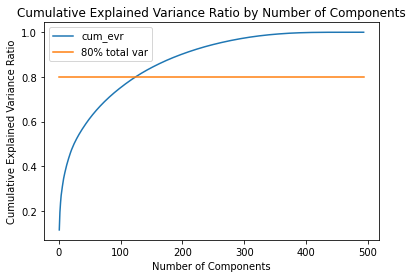

In [ ]:
plt.plot(np.arange(1, 494), cum_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.plot(np.arange(1, 494), [0.8]*493)
plt.legend(['cum_evr', '80% total var'])
plt.show()

It seems that that we only need 120 components. We transform the train and test set accordingly below.

In [ ]:
pca = PCA(n_components=120)
pca.fit(x_train_sc)
x_train_pca = pca.transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

## Linear Regression
For our first model, we will attempt a linear regression.



In [ ]:
from sklearn.linear_model import LinearRegression

# Your code here
lr = LinearRegression()
lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)
score = lr.score(x_test_pca, y_test)
print(score)

0.5499033819307514


Our reported score is 55%. Which is acceptable but not very good.

That did not work too well. Let's try a Lasso Regression next.

In [ ]:
from sklearn.linear_model import Lasso

# TO-DO: Instantiate, fit, predict, and score logistic regression
pca_las = Lasso(alpha=1.0)
pca_las.fit(x_train_pca, y_train)
pca_las_y_pred = pca_las.predict(x_test_pca)
test_accuracy = pca_las.score(x_test_pca, y_test)
test_accuracy

-3.1479858043637066e-05

This is terrible. Clearly, this not the regularization we want. So we should lean towards the other direction and use a Ridge Regression.

In [ ]:
from sklearn.linear_model import Ridge

# Your code here
rr = Ridge()
rr.fit(x_train_pca, y_train)
ridge_score = rr.score(x_test_pca, y_test)
print(ridge_score)

0.5499056017497337


Again, we did not get much improvement, it seems that this is the best we can do.

# Conclusions

We were able to generate a linear regression model which we can use to predict the admission rate of a university given data collected as specified in the College ScoreCard data dictionary. While the model accuracy could be improved, at least we can get a general idea of the difficulty of getting into a school. Similarly, this can also be applied to offer us insight on what makes a school competitive. By examining the features that contribute the most to our regression, we can see how to make schools more fair, and give more students opportunities to enroll in the institutions that are right for them.

We faced a lot of challenges given the size and quality of our data. There was a lot of missing values, data was inconsistent between years, some columns contained multiple data types, and many more challenges. We found it difficult to reduce out dataset to a usable quality.

Next steps would be to scrape data from US News. It would be cool to use their ranking as our target, and try to use our features to predict the ranking.
